In [4]:
import sys
sys.path.extend(['/Users/zsolt/Colloid_git/TractionRheoscopy'])
from data_analysis import static as da
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from importlib import reload

In [224]:
import gc

In [58]:
reload(da);

In [5]:
hdf_stem = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/locations_stitch/'

In [6]:
sed_fName = 'tfrGel10212018A_shearRun10292018f_sed_stitched.h5'
sedPos = da.loadData2Mem(hdf_stem + sed_fName)

In [7]:
sedStrain_traj = pd.read_hdf(hdf_stem + 'tfrGel10212018A_shearRun10292018f_sed_strainTraj_dt3.h5')

In [5]:
gel_fName = 'tfrGel10212018A_shearRun10292018f_gel_stitched.h5'
gelPos = da.loadData2Mem(hdf_stem + gel_fName)

In [62]:
# read in save strain traj
sedStrain_traj = pd.read_hdf(hdf_stem + 'tfrGel10212018A_shearRun10292018f_sed_strainTraj.h5')

# Add the missing time point from a bug when initially running the code
tmp = da.localStrain(sedPos,0,1)
tmp = tmp.stack().rename('(0,1)').to_frame()
tmp.set_index(tmp.index.rename(['particle','values']),inplace=True)
sedStrain_traj = sedStrain_traj.join(tmp)
del tmp

# reorder to get the right order
tPairs = sedStrain_traj.columns.tolist()
tPairs = tPairs[-1:] + tPairs[:-1]
sedStrain_traj = sedStrain_traj[tPairs]

# Save with key ZeroRef 
strain_fName = 'tfrGel10212018A_shearRun10292018f_sed_strainTrajZeroRef.h5'
sedStrain_traj.to_hdf(hdf_stem + strain_fName,'ZeroRef', mode='a', data_columns=True)

In [225]:
# create a different strain trajectory from a list ofttime pairs
del sedStrain_traj
gc.collect()

tPairList = list(zip([n for n in range(90)],[n for n in range(3,90)]))
tPairList
sedStrain_traj = da.makeLocalStrainTraj(sedPos, tPairList)
strain_fName = 'tfrGel10212018A_shearRun10292018f_sed_strainTraj_dt3.h5'
sedStrain_traj.to_hdf(hdf_stem + strain_fName,'dt3', mode='a', data_columns=True)

In [226]:
sedStrain_traj.dropna().head(20)

(0,1)     (0,3)     (1,4)     (2,5)     (3,6)  \
particle values                                                         
50       D2_min      0.086053  0.118480  0.159460  0.043152  0.093520   
         exx         0.008215  0.008357  0.000456 -0.000325  0.002524   
         exy        -0.006771 -0.003069  0.010678  0.001114  0.001329   
         exz         0.015048  0.005928 -0.015478 -0.002778 -0.011768   
         eyy        -0.004094 -0.004375  0.000689  0.009141 -0.013932   
         eyz        -0.013919 -0.011874  0.022067 -0.009656  0.005195   
         ezz         0.021919  0.038653 -0.019895 -0.004834 -0.020052   
         rxy        -0.000664  0.001095 -0.001336  0.002907 -0.002088   
         rxz         0.004974  0.002619 -0.001169 -0.000531  0.018892   
         ryz         0.014231  0.007040 -0.019802 -0.009379 -0.009051   
         nnb count  10.000000  9.000000  9.000000  9.000000  8.000000   
56       D2_min      0.056414  0.054515  0.069545  0.106798  0.071088   
         exx        -0.001711 -0.000555 -0.000084  0.004560 -0.000606   
         exy         0.000087 -0.000509 -0.000380  0.005948 -0.001734   
         exz        -0.005388 -0.004626 -0.004911  0.006393 -0.008133   
         eyy        -0.002442  0.000304 -0.000779 -0.005777  0.001119   
         eyz         0.004875  0.002997 -0.016974 -0.001535 -0.006586   
         ezz        -0.023649 -0.012929  0.006666  0.005549 -0.001946   
         rxy         0.002809  0.003140  0.001517 -0.002044 -0.007831   
         rxz        -0.012164 -0.011296  0.005273  0.002763  0.005725   

                       (4,7)     (5,8)     (6,9)    (7,10)    (8,11)  ...  \
particle values                                                       ...   
50       D2_min     0.128306  0.034392  0.052410  0.161515  0.121666  ...   
         exx       -0.008601  0.002424  0.001127  0.025705  0.011394  ...   
         exy       -0.006913 -0.001724  0.000495 -0.006492 -0.006823  ...   
         exz        0.003710  0.006691  0.001353  0.016075  0.002293  ...   
         eyy       -0.007386 -0.004566  0.002779 -0.001044 -0.006338  ...   
         eyz       -0.014167  0.001241  0.005003  0.000540 -0.007286  ...   
         ezz        0.045116  0.009256 -0.020070 -0.046882  0.034846  ...   
         rxy        0.008503  0.003421  0.002911 -0.003683 -0.007248  ...   
         rxz        0.010498  0.007616 -0.004699  0.003502 -0.020312  ...   
         ryz        0.002358  0.006763 -0.001465 -0.008674  0.010059  ...   
         nnb count  8.000000  8.000000  8.000000  9.000000  9.000000  ...   
56       D2_min     0.174461  0.075955  0.072950  0.083707  0.120079  ...   
         exx       -0.003646 -0.001799 -0.002726 -0.000809 -0.007421  ...   
         exy       -0.004504  0.000403  0.001958  0.003582 -0.009131  ...   
         exz       -0.001883 -0.008836 -0.002760  0.004583 -0.000695  ...   
         eyy        0.008346 -0.001247 -0.001635 -0.006268  0.000637  ...   
         eyz        0.003553 -0.003277  0.002144  0.013578 -0.001032  ...   
         ezz       -0.027726 -0.005710 -0.015778  0.011429 -0.024182  ...   
         rxy       -0.007730  0.007062  0.008360  0.003036 -0.001315  ...   
         rxz        0.007932  0.009544  0.003909 -0.005085  0.000051  ...   

                      (77,80)    (78,81)   (79,82)   (80,83)   (81,84)  \
particle values                                                          
50       D2_min      0.196034   0.644358  0.056490  0.152162  0.175765   
         exx         0.001990   0.003521 -0.009160  0.007841  0.005499   
         exy         0.001288  -0.000912  0.001822 -0.000919  0.001446   
         exz         0.007746   0.001515  0.002315 -0.010643  0.026490   
         eyy        -0.002879   0.000374 -0.015565  0.007436  0.005323   
         eyz         0.002045   0.007979  0.004232 -0.010186 -0.000484   
         ezz         0.023926  -0.100736  0.010561  0.019919  0.052235   
         rxy        -0.007317   0.000295  0.007378  0.00

In [223]:
sedStrain_traj_dt3.dropna()

(0,1)     (0,3)     (1,4)
particle values                                 
1        D2_min     0.091007  0.160599  0.119675
         exx        0.011591 -0.029463 -0.032953
         exy       -0.010121 -0.015082 -0.021602
         exz       -0.007984 -0.014228  0.019735
         eyy        0.008537 -0.010697 -0.018138
...                      ...       ...       ...
966620   ezz       -0.013288 -0.091173  0.012869
         rxy       -0.010417 -0.033643  0.005118
         rxz        0.001705  0.035942 -0.004919
         ryz       -0.001611  0.016176  0.005388
         nnb count  9.000000  9.000000  9.000000

[10517320 rows x 3 columns]

In [59]:
fitPlane_dict = da.fitTopSurface(gelPos)
da.distFromPlane(gelPos,'z (um, below gel)',fitPlane_dict)
gelStrain_traj = da.gelStrain(gelPos,160)

/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py:124: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fit, residual, rank, s = np.linalg.lstsq(A, z)


In [63]:
gelStrain_traj.dropna()

Ref Pos      (0,0)      (0,1)      (0,2)  \
particle value                                                             
3        x (um, imageStack)   29.681689   0.000000  -0.032821   0.099502   
         y (um, imageStack)   13.350886   0.000000  -0.017842   0.039460   
         z (um, imageStack)    5.578862   0.000000  -0.098031  -0.162779   
         e_xz                  0.000000   0.000000  -0.000198   0.000601   
         z (um, below gel)   -18.500928 -18.500928 -18.772998 -18.628887   
...                                 ...        ...        ...        ...   
3167     x (um, imageStack)  197.364440   0.000000   0.004831   0.234526   
         y (um, imageStack)  201.825359   0.000000  -0.001116  -0.042353   
         z (um, imageStack)   24.349485   0.000000  -0.028551  -0.120067   
         e_xz                  0.000000   0.000000   0.000026   0.001272   
         z (um, below gel)    -2.058735  -2.058735  -1.985182  -2.195680   

                                 (0,3)      (0,4)      (0,5)      (0,6)  \
particle value                                                            
3        x (um, imageStack)   0.305819   0.428342   0.519632   0.645046   
         y (um, imageStack)  -0.050293  -0.104591  -0.157356  -0.087643   
         z (um, imageStack)  -0.186965  -0.236977  -0.297549  -0.243068   
         e_xz                 0.001847   0.002587   0.003138   0.003896   
         z (um, below gel)  -18.867155 -18.565677 -18.724014 -18.635266   
...                                ...        ...        ...        ...   
3167     x (um, imageStack)   0.465288   0.572797   0.668417   0.830889   
         y (um, imageStack)  -0.068260  -0.197134  -0.184499  -0.195076   
         z (um, imageStack)  -0.150152  -0.148221  -0.088609  -0.185968   
         e_xz                 0.002524   0.003107   0.003626   0.004507   
         z (um, below gel)   -2.026164  -2.151042  -2.092649  -2.195408   

                                 (0,7)      (0,8)  ...     (0,80)     (0,81)  \
particle value                                     ...                         
3        x (um, imageStack)   0.815967   0.923361  ...   0.061869   0.042623   
         y (um, imageStack)  -0.065672  -0.085187  ...  -0.335904  -0.408020   
         z (um, imageStack)  -0.309091  -0.307070  ...  -0.687327  -0.784401   
         e_xz                 0.004928   0.005577  ...   0.000374   0.000257   
         z (um, below gel)  -18.877036 -18.757674  ... -18.978800 -19.181719   
...                                ...        ...  ...        ...        ...   
3167     x (um, imageStack)   0.998330   1.100755  ...   0.085899   0.048214   
         y (um, imageStack)  -0.161924  -0.133974  ...  -0.528767  -0.583508   
         z (um, imageStack)  -0.168648  -0.216289  ...  -0.330255  -0.296229   
         e_xz                 0.005415   0.005971  ...   0.000466   0.000262   
         z (um, below gel)   -1.877383  -2.049843  ...  -1.962678  -1.922240   

                                (0,82)     (0,83)     (0,84)     (0,85)  \
particle value                                                            
3        x (um, imageStack)   0.067159   0.077378   0.058749   0.002037   
         y (um, imageStack)  -0.295421  -0.329066  -0.390096  -0.343746   
         z (um, imageStack)  -0.730022  -0.688332  -0.680038  -0.684385   
         e_xz                 0.000406   0.000467   0.000355   0.000012   
         z (um, below gel)  -18.914738 -18.489705 -18.899215 -19.189473   
...                                ...        ...        ...        ...   
3167     x (um, imageStack)   0.071419   0.106239   0.000733  -0.048159   
         y (um, imageStack)  -0.549920  -0.578838  -0.593692  -0.620853   
         z (um, imageStack)  -0.265308  -0.293511  -0.312571  -0.252970   
         e_xz                 0.000387   0.000576   0.000004  -0.000261   
         z (um, below gel)   -2.098304  -2.010319  -1.954722  -1.978494   

                                (0,86)     (0,87) 

In [516]:
len(np.array(shearDisp_mean)/60)

90

In [508]:
(45-8)*100/(0.8-0.4)

9250.0

In [136]:
gelStrain_traj.head()

Ref Pos      (0,0)      (0,1)      (0,2)  \
particle value                                                            
0        x (um, imageStack)  11.061014   0.000000   0.009509   0.169471   
         y (um, imageStack)  17.360880   0.000000  -0.019537   0.000999   
         z (um, imageStack)   4.273772   0.000000  -0.045735  -0.168559   
         e_xz                 0.000000   0.000000   0.000058   0.001032   
         z (um, below gel)  -19.956049 -19.956049 -20.199734 -20.102573   

                                 (0,3)  (0,4)  (0,5)  (0,6)  (0,7)  (0,8)  \
particle value                                                              
0        x (um, imageStack)   0.388578    NaN    NaN    NaN    NaN    NaN   
         y (um, imageStack)  -0.044668    NaN    NaN    NaN    NaN    NaN   
         z (um, imageStack)  -0.153111    NaN    NaN    NaN    NaN    NaN   
         e_xz                 0.002365    NaN    NaN    NaN    NaN    NaN   
         z (um, below gel)  -20.318512    NaN    NaN    NaN    NaN    NaN   

                             ...  (0,80)  (0,81)  (0,82)  (0,83)  (0,84)  \
particle value               ...                                           
0        x (um, imageStack)  ...     NaN     NaN     NaN     NaN     NaN   
         y (um, imageStack)  ...     NaN     NaN     NaN     NaN     NaN   
         z (um, imageStack)  ...     NaN     NaN     NaN     NaN     NaN   
         e_xz                ...     NaN     NaN     NaN     NaN     NaN   
         z (um, below gel)   ...     NaN     NaN     NaN     NaN     NaN   

                             (0,85)  (0,86)  (0,87)  (0,88)  (0,89)  
particle value                                                       
0        x (um, imageStack)     NaN     NaN     NaN     NaN     NaN  
         y (um, imageStack)     NaN     NaN     NaN     NaN     NaN  
         z (um, imageStack)     NaN     NaN     NaN     NaN     NaN  
         e_xz                   NaN     NaN     NaN     NaN     NaN  
         z (um, below gel)      NaN     NaN     NaN     NaN     NaN  

[5 rows x 91 columns]

In [223]:
strain_traj = pd.read_hdf(hdf_stem + strain_fName)

In [226]:
strain_traj

(0,1)     (1,2)     (2,3)     (3,4)     (4,5)  \
particle values                                                        
0        D2_min     0.176064       NaN       NaN       NaN       NaN   
         exx        0.016755       NaN       NaN       NaN       NaN   
         exy       -0.005082       NaN       NaN       NaN       NaN   
         exz        0.009494       NaN       NaN       NaN       NaN   
         eyy       -0.010655       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
966620   ezz       -0.013288 -0.064631 -0.012311  0.058924 -0.064010   
         rxy       -0.010417 -0.017624 -0.003522  0.028408 -0.006902   
         rxz        0.001705  0.031568  0.002657 -0.041027  0.045330   
         ryz       -0.001611  0.024735 -0.006826 -0.013045  0.000994   
         nnb count  9.000000  9.000000  9.000000  9.000000  9.000000   

                       (5,6)     (6,7)     (7,8)     (8,9)  (9,10)  ...  \
particle values                                                     ...   
0        D2_min          NaN       NaN       NaN       NaN     NaN  ...   
         exx             NaN       NaN       NaN       NaN     NaN  ...   
         exy             NaN       NaN       NaN       NaN     NaN  ...   
         exz             NaN       NaN       NaN       NaN     NaN  ...   
         eyy             NaN       NaN       NaN       NaN     NaN  ...   
...                      ...       ...       ...       ...     ...  ...   
966620   ezz        0.009743 -0.003281  0.019372 -0.013960     NaN  ...   
         rxy       -0.008144  0.002293 -0.012407  0.001009     NaN  ...   
         rxz       -0.016942  0.029461 -0.007669 -0.004718     NaN  ...   
         ryz        0.006089  0.006191 -0.001943  0.008348     NaN  ...   
         nnb count  9.000000  8.000000  7.000000  7.000000     NaN  ...   

                    (79,80)  (80,81)  (81,82)  (82,83)  (83,84)  (84,85)  \
particle values                                                            
0        D2_min         NaN      NaN      NaN      NaN      NaN      NaN   
         exx            NaN      NaN      NaN      NaN      NaN      NaN   
         exy            NaN      NaN      NaN      NaN      NaN      NaN   
         exz            NaN      NaN      NaN      NaN      NaN      NaN   
         eyy            NaN      NaN      NaN      NaN      NaN      NaN   
...                     ...      ...      ...      ...      ...      ...   
966620   ezz            NaN      NaN      NaN      NaN      NaN      NaN   
         rxy            NaN      NaN      NaN      NaN      NaN      NaN   
         rxz            NaN      NaN      NaN      NaN      NaN      NaN   
         ryz            NaN      NaN      NaN      NaN      NaN      NaN   
         nnb count      NaN      NaN      NaN      NaN      NaN      NaN   

                    (85,86)  (86,87)  (87,88)  (88,89)  
particle values                                         
0        D2_min         NaN      NaN      NaN      NaN  
         exx            NaN      NaN      NaN      NaN  
         exy            NaN      NaN      NaN      NaN  
         exz            NaN      NaN      NaN      NaN  
         eyy            NaN      NaN      NaN      NaN  
...                     ...      ...      ...      ...  
966620   ezz            NaN      NaN      NaN      NaN  
         rxy            NaN      NaN      NaN      NaN  
         rxz            NaN      NaN      NaN      NaN  
         ryz            NaN      NaN      NaN      NaN  
         nnb count      NaN      NaN      NaN      NaN  

[10584664 rows x 89 columns]

In [112]:
figPath = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/plots/sedStrain'

In [94]:
meanAffineStrain = pd.DataFrame(sedStrain_traj.xs('exz',level='values').describe().loc[['mean','std','count']])

meanAffineStrain.apply(lambda x: x.loc['std']/x.loc['count']);

[Text(0, 0.5, 'Mean Shear Strain (%)'),
 Text(0.5, 0, 'Frame (3 min/frame)'),
 Text(0.5, 1.0, 'Mean shear strain (gamma = 2 * <e_xz>) \n computed with best-fit affine strain')]

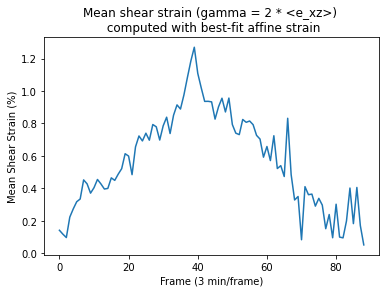

In [95]:
# Plot Gamma = 2<exz> along with error bars for uncertainty in the mean
tmp = sedStrain_traj.xs('exz',level='values').describe().loc['mean']*100*2
g = sns.lineplot(y=tmp,x=range(89))
g.set(xlabel='Frame (3 min/frame)', ylabel = 'Mean Shear Strain (%)',title='Mean shear strain (gamma = 2 * <e_xz>) \n computed with best-fit affine strain')

In [113]:

#sns.lineplot('tf','standard deviation',data=out_df)
#plt.savefig(figPath+'/{}'.format('average_exz_Strain.png'),dpi=300,bbox_inches='tight')

In [340]:
sed_disp = sedPos.xs(41,level='frame') - sedPos.xs(0,level='frame')
sed_disp['zbin'] = pd.cut(sedPos.xs(0,level='frame')['z (um, imageStack)'], 60)

In [361]:
sed_disp[sed_disp['zbin'] == pd.Interval(left=83.954, right=84.965)].describe().loc['mean']['x (um, imageStack)']
gelPos.xs(0,level='frame')[gelPos.xs(0,level='frame')['best fit dist from top surface']>0]

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,best fit dist from top surface
particle,,,,,,,
77,53.501745,19.030548,24.483899,0.137343,0.138534,0.123846,0.418938
79,72.141772,9.266733,24.147199,0.105356,0.107506,0.078461,0.326623
80,83.705010,13.168088,24.492719,0.092156,0.100034,0.076078,0.660596
81,90.538408,29.518478,24.370547,0.126569,0.122406,0.108938,0.301497
82,66.513276,5.622348,24.596129,0.130855,0.130441,0.102693,0.809770
...,...,...,...,...,...,...,...
3147,219.610133,216.820327,27.189456,0.096131,0.102408,0.083829,0.636316
3148,191.499883,221.794419,26.959919,0.106393,0.108507,0.085079,0.197975
3149,204.819830,227.821741,26.901032,0.087757,0.084128,0.075382,0.100665


In [370]:
t=1
sed_disp = sedPos.xs(t,level='frame') - sedPos.xs(0, level='frame')
sed_disp['zbin'] = pd.cut(sedPos.xs(0,level='frame')['z (um, imageStack)'], 60)
sed_disp = sed_disp[sed_disp['zbin'] == pd.Interval(left=83.954, right=84.965)]

In [384]:
gelTopFitPlane = da.fitTopSurface(gelPos)

In [385]:
da.distFromPlane(gelPos,'best fit dist from top surface', gelTopFitPlane)

In [386]:
gelPos_t = gelPos.xs(t,level='frame')
gelPos_0 = gelPos.xs(0,level='frame')
gel_disp = gelPos_t[gelPos_t['best fit dist from top surface'] > 0 ] - gelPos_0[gelPos_0['best fit dist from top surface'] > 0 ]

gelPos_0[gelPos_0['best fit dist from top surface'] > 0 ]
gel_disp.dropna()

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,best fit dist from top surface
particle,,,,,,,
77,0.006007,-0.017816,-0.030733,-0.007653,-0.005306,-0.001367,-0.170792
79,0.019673,-0.047762,-0.030532,-0.010414,-0.005938,-0.003761,-0.147309
80,0.110406,0.048629,0.039965,-0.001316,0.001374,-0.002545,-0.061150
81,0.010476,0.007446,0.005118,-0.005465,-0.013137,-0.005654,-0.082412
82,0.008263,-0.040828,-0.035417,-0.015786,-0.010679,-0.008774,-0.160946
...,...,...,...,...,...,...,...
3145,0.000520,0.029011,-0.055900,-0.007430,-0.005698,-0.015527,0.054428
3146,0.014753,-0.020238,-0.038502,-0.003598,-0.009324,-0.016189,0.063315
3148,0.010372,0.017147,0.016162,-0.001058,-0.002741,-0.001900,0.115249


In [1]:
sed_disp['zbin'] = pd.cut(sedPos.xs(0,level='frame')['z (um, imageStack)'], 60)
sed_disp = sed_disp[sed_disp['zbin'] == pd.Interval(left=83.954, right=84.965)]

NameError: name 'pd' is not defined

In [103]:
# I have to figure out to speed this up. Just ridiculous. I need to select on z, possibly bin and then subtract some numbers.
# Also there are some hard coded values in here on the zbin selection
posKey = ['x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)']
out = []
for t in range(90):
    #print(t)
    sed_disp = sedPos.xs(t,level='frame') - sedPos.xs(0, level='frame')
    sed_disp['zbin'] = pd.cut(sedPos.xs(0,level='frame')['z (um, imageStack)'], 60)
    sed_disp = sed_disp[sed_disp['zbin'] == pd.Interval(left=83.954, right=84.965)]
    
    gelPos_t = gelPos.xs(t,level='frame')
    gelPos_0 = gelPos.xs(0,level='frame')
    gel_disp = gelPos_t[gelPos_t['z (um, below gel)'] > 0 ] - gelPos_0[gelPos_0['z (um, below gel)'] > 0 ]
    
    sedStat = sed_disp['x (um, imageStack)'].mean()
    gelStat = gel_disp['x (um, imageStack)'].mean()
    #print(sedStat, gelStat, sedStat-gelStat)
    out.append([gelStat,sedStat, sedStat-gelStat])

In [107]:
avgDisplacement = pd.DataFrame(out,columns=['Avg displacement top gel (um)',
                                           'Avg displacement shear plate (um)', 
                                           'Relative displacement (plate - gel)'])
avgDisplacement

In [108]:
avgDisplacement['Avg displacement top gel (um)']

0     0.000000
1     0.014855
2     0.231019
3     0.444129
4     0.546857
        ...   
85    0.087571
86    0.076938
87    0.119353
88    0.123981
89    0.141448
Name: Avg displacement top gel (um), Length: 90, dtype: float64

In [529]:
25/0.004

6250.0

In [114]:
shearDisp_mean = avgDisplacement['Relative displacement (plate - gel)']
plateDisp_mean = avgDisplacement['Avg displacement shear plate (um)']
gelDisp_mean = avgDisplacement['Avg displacement top gel (um)']

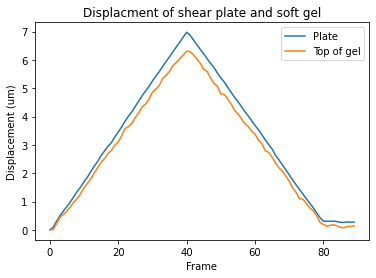

In [116]:
#sns.lineplot(y=shearDisp_mean,x=range(90))
sns.lineplot(y=plateDisp_mean,x=range(90))
g = sns.lineplot(y=gelDisp_mean,x=range(90))
g.set(xlabel = "Frame", ylabel='Displacement (um)', title='Displacment of shear plate and soft gel')
g.legend(['Plate', 'Top of gel'])
#plt.savefig(figPath+'/{}'.format('displacement_Plate_Gel.png'),dpi=300,bbox_inches='tight')

[Text(0, 0.5, 'Relative displacment of plate and gel (um)'),
 Text(0.5, 0, 'Frame number')]

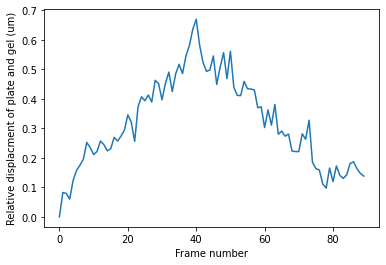

In [117]:
g = sns.lineplot(y=shearDisp_mean,x=range(90))
g.set(xlabel="Frame number",ylabel="Relative displacment of plate and gel (um)")
#plt.savefig(figPath+'/{}'.format('relativeDisplacement_plateGel.png'),dpi=300,bbox_inches='tight')

In [122]:
tmp = sedStrain_traj.xs('exz',level='values').describe().loc['mean']*100*2

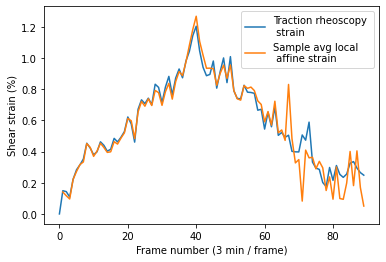

In [129]:
g = sns.lineplot(y=np.array(shearDisp_mean)/(83.954-28.348)*100,x=range(90))
g = sns.lineplot(y=tmp,x=range(1,90))
g.set(xlabel="Frame number (3 min / frame)",ylabel="Shear strain (%)")
g.legend(['Traction rheoscopy \n strain','Sample avg local \n affine strain'])
plt.savefig(figPath+'/{}'.format('shearStrain_methodComparison.png'),dpi=300,bbox_inches='tight')

[Text(0, 0.5, 'Shear stress (mPa)'),
 Text(0.5, 0, 'Shear strain on the sample (%)')]

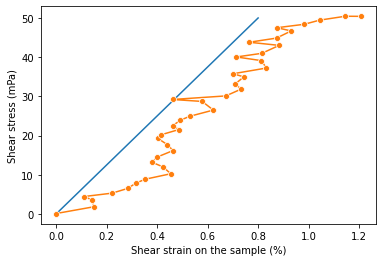

In [146]:
n_strain_limitFit = np.array([0,0.4,0.8])
n_stress_limitFit = np.array([0,25,50])
sampleThickness = 55.6 # 83.954-28.348 
#from zbin 1um and looking at number of counts in each bin. 
#Not quite the highest pt as the grid is imaged in the sample and not quite the lowest point as the gel is tilted
# note you have to shift the signal by 2 
fig = plt.figure()
ax=plt.axes()
ax.plot(n_strain_limitFit,n_stress_limitFit)
g=sns.lineplot(y = (gelStrain_traj.xs('e_xz',level='value').mean()*1500)[2:43], 
               x = (np.array(shearDisp_mean)/sampleThickness*100)[0:41],
               sort=False,marker='o')
g.set(xlabel="Shear strain on the sample (%)", ylabel="Shear stress (mPa)")
#plt.show()
#plt.savefig(figPath+'/{}'.format('stressStrain_loading_w_6_25Pa_trendLine.png'),dpi=300,bbox_inches='tight')

In [346]:
sed_disp.dropna().groupby('zbin')[['x (um, imageStack)','y (um, imageStack)', 'z (um, imageStack)']].describe()['x (um, imageStack)']

,count,mean,std,min,25%,50%,75%,max
zbin,,,,,,,,
"(26.265, 27.337]",1927.0,6.271282,0.038130,6.173452,6.242111,6.263845,6.299061,6.392386
"(27.337, 28.348]",5543.0,6.295452,0.056141,6.033489,6.253536,6.283998,6.326171,6.537882
"(28.348, 29.359]",9349.0,6.308485,0.061729,5.987491,6.263382,6.295792,6.344548,6.598430
"(29.359, 30.37]",13117.0,6.326480,0.065033,5.996624,6.277954,6.314807,6.364911,6.566443
"(30.37, 31.381]",15278.0,6.339531,0.070129,6.047367,6.287500,6.327033,6.379670,6.613532
"(31.381, 32.392]",15803.0,6.349651,0.073470,6.043101,6.295053,6.336107,6.391242,6.754159
"(32.392, 33.403]",15836.0,6.355909,0.073888,6.029714,6.300441,6.342745,6.398938,6.717349
"(33.403, 34.414]",15975.0,6.364917,0.074270,6.024994,6.309094,6.352116,6.409197,6.721844
"(34.414, 35.425]",16177.0,6.377917,0.073933,5.848153,6.323046,6.364411,6.422228,6.736441


[Text(0, 0.5, 'Shear stress (mPa)'), Text(0.5, 0, 'Strain (%)')]

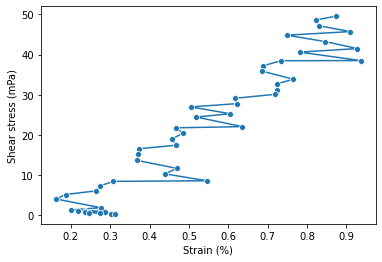

In [534]:
g=sns.lineplot(y = (gelStrain_traj.xs('e_xz',level='value').mean()*1500)[43:90], x = (np.array(shearDisp_mean)/60*100)[42:89],sort=False,marker='o')
g.set(xlabel="Strain (%)", ylabel="Shear stress (mPa)")
#sns.scatterplot(y = gelStrain_traj.xs('e_xz',level='value').mean()[42:84], x = (np.array(shearDisp_mean)/60)[41:83])

In [535]:
(6.89 - 6.29)/(85.976 - 28.348)
83.954-28.348

55.605999999999995

In [148]:
gel_disp = gelPos.xs(41, level='frame') - gelPos.xs(0, level='frame')
gel_disp['zbin'] = pd.cut(gelPos.xs(0,level='frame')['best fit dist from top surface'],10)
gel_disp.dropna().groupby('zbin')['x (um, imageStack)'].describe()

# Visualize particle positions after selecting based on some property
The goal here is to seleect, for example, particle trajectories with D2Min above some threshold and write an xyz with those positions

In [149]:
sedStrain_micro = sedStrain_traj.dropna().head(22)
sedStrain_micro

(0,1)      (0,2)      (0,3)      (0,4)      (0,5)  \
particle values                                                             
50       D2_min      0.086053   0.040833   0.118480   0.064422   0.060528   
         exx         0.008215   0.002685   0.008357   0.009257   0.002413   
         exy        -0.006771   0.003178  -0.003069   0.004394   0.004232   
         exz         0.015048   0.008079   0.005928  -0.000007   0.005276   
         eyy        -0.004094  -0.009947  -0.004375  -0.003769  -0.000750   
         eyz        -0.013919  -0.002694  -0.011874   0.010078  -0.012632   
         ezz         0.021919   0.009461   0.038653   0.001484   0.004748   
         rxy        -0.000664  -0.000954   0.001095  -0.001244   0.001937   
         rxz         0.004974   0.006909   0.002619   0.003459   0.006546   
         ryz         0.014231   0.002982   0.007040  -0.007468  -0.006569   
         nnb count  10.000000   9.000000   9.000000   9.000000   9.000000   
56       D2_min      0.056414   0.163265   0.054515   0.087320   0.072647   
         exx        -0.001711  -0.004781  -0.000555  -0.001737   0.000142   
         exy         0.000087  -0.002921  -0.000509  -0.000439   0.003638   
         exz        -0.005388  -0.012243  -0.004626  -0.010211  -0.005748   
         eyy        -0.002442   0.005230   0.000304  -0.003493   0.000795   
         eyz         0.004875  -0.001019   0.002997  -0.011753  -0.002550   
         ezz        -0.023649  -0.011760  -0.012929  -0.016904  -0.005828   
         rxy         0.002809   0.000663   0.003140   0.004539  -0.001261   
         rxz        -0.012164  -0.016505  -0.011296  -0.007062  -0.014231   
         ryz        -0.000045  -0.021256   0.003081  -0.010572  -0.003554   
         nnb count  10.000000  10.000000  10.000000  10.000000  10.000000   

                        (0,6)      (0,7)      (0,8)      (0,9)     (0,10)  \
particle values                                                             
50       D2_min      0.068903   0.096678   0.058977   0.044444   0.110697   
         exx         0.014419   0.002514   0.012105   0.015669   0.028257   
         exy         0.000007   0.001588   0.007008   0.000468  -0.004092   
         exz         0.004676   0.010519   0.017414   0.006197   0.024919   
         eyy        -0.017936  -0.011029  -0.005098  -0.015199  -0.007614   
         eyz        -0.006392  -0.003908  -0.011556  -0.001266  -0.009693   
         ezz         0.015819   0.046427   0.013405  -0.003403   0.001328   
         rxy        -0.002857   0.003413   0.000981   0.000016  -0.001082   
         rxz         0.011180   0.007040   0.008048   0.006265   0.013265   
         ryz        -0.002746  -0.006149  -0.000250  -0.004149  -0.009590   
         nnb count   8.000000   8.000000   8.000000   8.000000   8.000000   
56       D2_min      0.067473   0.133285   0.074030   0.072715   0.081121   
         exx        -0.000957  -0.005207  -0.001628  -0.003700  -0.005466   
         exy        -0.002393  -0.005041   0.004106  -0.000482  -0.001374   
         exz        -0.012760  -0.011940  -0.014501  -0.015609  -0.006687   
         eyy         0.001601   0.005146  -0.000507   0.000116  -0.001092   
         eyz        -0.003566  -0.009310  -0.005615  -0.001518   0.004308   
         ezz        -0.014325  -0.043184  -0.010218  -0.029045  -0.031175   
         rxy        -0.004669  -0.003297   0.005817   0.003670   0.000046   
         rxz        -0.005459   0.000972  -0.004610  -0.001653  -0.003460   
         ryz        -0.007565   0.000544  -0.007760   0.002469   0.003193   
         nnb count  10.000000  10.000000  10.000000  10.000000  10.000000   

                    ...    (0,80)    (0,81)    (0,82)    (0,83)    (0,84)  \
particle values     ...                                                     
50       D2_min     ...  0.097796  0.388783  0.146193  0.202718  0.229484   
         exx        ...  0.009593  0.013937  0.017698  0.014380  0.024129   
         exy      

In [ ]:
(sedStrain_micro.xs('D2_min',level='values' )> 0.1).transpose().reset_index().drop(columns='index').stack()

In [8]:
tmp = (sedStrain_traj.xs('D2_min',level='values' )> 0.6).transpose().reset_index()

In [9]:
tmp.index = range(2,90)
tmp = pd.DataFrame(tmp.drop(columns='index').stack())
tmp.set_index(tmp.index.rename(['frame','particle']),inplace=True)
tmp = tmp.rename(columns={0:'Large D2_Min_dt3'})

NameError: name 'sedPos' is not defined

In [10]:
sedPos = sedPos.join(tmp)

#tmp = sedPos.xs(1,level='frame').dropna()[sedPos.xs(1,level='frame').dropna()['Large D2_Min']][['x (um, imageStack)','y (um, imageStack)','z (um, imageStack)']]

d2Min_xyzPath = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/plots/large_D2Min_xyz/dt3_Strain'
for t in range(2,90):
    d2Min_fName = 'd2Min_dt3Strain_t{:02}.xyz'.format(t)
    with open(d2Min_xyzPath+'/{}'.format(d2Min_fName),'a') as f:
        pos_tmp = sedPos.xs(t,level='frame').dropna()[sedPos.xs(t,level='frame').dropna()['Large D2_Min_dt3']][['x (um, imageStack)','y (um, imageStack)','z (um, imageStack)']]
        f.write('{}\n\n'.format(len(pos_tmp)))
        pos_tmp.to_csv(f,sep=' ',header=False, index=False)

In [ ]:
.drop(columns='Large D2_min_dt3')